In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
sns.set(style='white', palette='muted',color_codes=True)
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
import plotly.express as px

In [2]:
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import StandardScaler,LabelEncoder,OrdinalEncoder,OneHotEncoder,MinMaxScaler 
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression,LinearRegression 
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor 
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor 
from sklearn.impute import SimpleImputer 
from sklearn.metrics import r2_score, accuracy_score, mean_squared_error, confusion_matrix,recall_score,silhouette_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [3]:
data = pd.read_csv(r'c:\Github\Fullstack-Data-Analyst\Learning\the_data\data-lab-5-hcv.csv')
data.head(1)
# data.info()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0


In [4]:
data.duplicated().sum()
mis_col = data.isna().sum() * 100 /len(data)
mis_col.sort_values(ascending=False)

ALP           2.926829
CHOL          1.626016
ALB           0.162602
ALT           0.162602
PROT          0.162602
Unnamed: 0    0.000000
Category      0.000000
Age           0.000000
Sex           0.000000
AST           0.000000
BIL           0.000000
CHE           0.000000
CREA          0.000000
GGT           0.000000
dtype: float64

In [5]:
impu = SimpleImputer(strategy='mean',missing_values=np.NaN)

miss_val = ['ALB', 'ALP', 'ALT', 'CHOL', 'PROT']

data[miss_val] = impu.fit_transform(data[miss_val])

In [6]:
data.duplicated().sum()
mis_col = data.isna().sum() * 100 /len(data)
mis_col.sort_values(ascending=False)

Unnamed: 0    0.0
Category      0.0
Age           0.0
Sex           0.0
ALB           0.0
ALP           0.0
ALT           0.0
AST           0.0
BIL           0.0
CHE           0.0
CHOL          0.0
CREA          0.0
GGT           0.0
PROT          0.0
dtype: float64

In [7]:
y = data.Category 
le = LabelEncoder()

true_labels = le.fit_transform(y)
data = pd.get_dummies(data,dtype=float)
data

,Unnamed: 0,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Category_0=Blood Donor,Category_0s=suspect Blood Donor,Category_1=Hepatitis,Category_2=Fibrosis,Category_3=Cirrhosis,Sex_f,Sex_m
0,1,32,38.5,52.50000,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2,32,38.5,70.30000,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,3,32,46.9,74.70000,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4,32,43.2,52.00000,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,5,32,39.2,74.10000,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,611,62,32.0,416.60000,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5,0.0,0.0,0.0,0.0,1.0,1.0,0.0
611,612,64,24.0,102.80000,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3,0.0,0.0,0.0,0.0,1.0,1.0,0.0
612,613,64,29.0,87.30000,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
613,614,46,33.0,68.28392,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [8]:
#Run The PCA pipeline

le.classes_ 

n_clusters = len(le.classes_)

preprocessor = Pipeline([ 
    ('scaler', MinMaxScaler()),
    ('pca', PCA(n_components=2,random_state=42))
])

# Build a K-means Model

In [9]:
#Initialize the pipeline

clusterer = Pipeline(
    [ 
    (
        'kmeans',
        KMeans(
            n_clusters=n_clusters,
            init='k-means++',
            n_init =50,
            max_iter = 500,
            random_state=42,
        )
    )
])

#Run the Preprocessor and clustering Pipeline

pipe = Pipeline(
    [ 
        ('preprocessor', preprocessor),
        ('clusterer',clusterer)
    ]
)

#Run the code to fit model into data

pipe.fit(data)


Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('scaler', MinMaxScaler()),
                                 ('pca',
                                  PCA(n_components=2, random_state=42))])),
                ('clusterer',
                 Pipeline(steps=[('kmeans',
                                  KMeans(max_iter=500, n_clusters=5, n_init=50,
                                         random_state=42))]))])

In [10]:
#Evaluate the data

preprocessed_data = pipe['preprocessor'].transform(data)
predicted_labes = pipe['clusterer']['kmeans'].labels_
silhouette_score(preprocessed_data,predicted_labes)


0.7503332193918001

In [11]:
data['predicted_labes'] = predicted_labes
data

,Unnamed: 0,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Category_0=Blood Donor,Category_0s=suspect Blood Donor,Category_1=Hepatitis,Category_2=Fibrosis,Category_3=Cirrhosis,Sex_f,Sex_m,predicted_labes
0,1,32,38.5,52.50000,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0
1,2,32,38.5,70.30000,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0
2,3,32,46.9,74.70000,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,4,32,43.2,52.00000,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0
4,5,32,39.2,74.10000,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,611,62,32.0,416.60000,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5,0.0,0.0,0.0,0.0,1.0,1.0,0.0,3
611,612,64,24.0,102.80000,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3,0.0,0.0,0.0,0.0,1.0,1.0,0.0,3
612,613,64,29.0,87.30000,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,3
613,614,46,33.0,68.28392,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,3


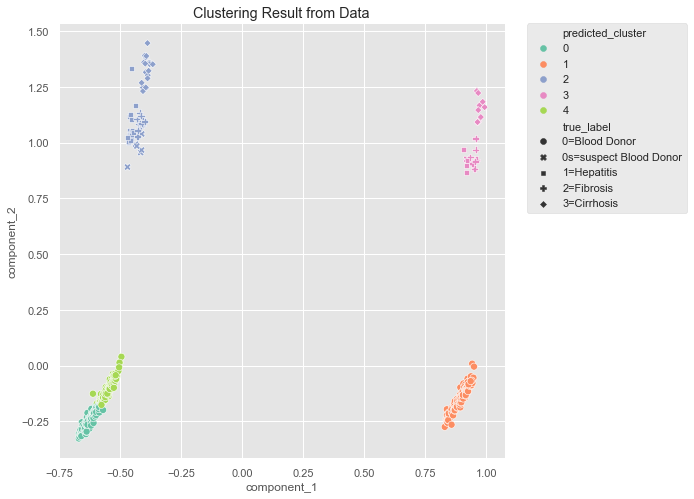

In [12]:
#Visualize the data

data.drop(columns='predicted_labes', inplace=True)

pcadf = pd.DataFrame( 
    pipe['preprocessor'].transform(data),
    columns = ['component_1', 'component_2'],
)
pcadf['predicted_cluster'] = pipe['clusterer']['kmeans'].labels_ 
pcadf['true_label'] = le.inverse_transform(true_labels)

plt.figure(figsize=(8,8))

scat = sns.scatterplot( 
    x='component_1',
    y='component_2',
    s=50,
    data=pcadf,
    hue='predicted_cluster',
    style='true_label',
    palette='Set2',
)
scat.set_title('Clustering Result from Data')

plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.0)
plt.show()